In [0]:
%fs ls dbfs:/FileStore/real-data

path,name,size,modificationTime
dbfs:/FileStore/real-data/coincap.csv,coincap.csv,194676,1706002267000
dbfs:/FileStore/real-data/data-1.csv,data-1.csv,40245049,1705938567000
dbfs:/FileStore/real-data/data.csv,data.csv,30360310,1705934662000


In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import pandas as pd
import numpy as np

inputPath = "/FileStore/real-data/coincap.csv"

jsonSchema = StructType([
    StructField("id", StringType(), True),
    StructField("rank", StringType(), True),
    StructField("symbol", StringType(), True),
    StructField("name", StringType(), True),
    StructField("supply", StringType(), True),
    StructField("maxSupply", StringType(), True),
    StructField("marketCapUsd", StringType(), True),
    StructField("volumeUsd24Hr", StringType(), True),
    StructField("priceUsd", StringType(), True),
    StructField("changePercent24Hr", StringType(), True),
    StructField("vwap24Hr", StringType(), True),
    StructField("explorer", StringType(), True)
])
coincap_df = spark.read.schema(jsonSchema).json(inputPath)
display(coincap_df)

id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
bitcoin,1,BTC,Bitcoin,19602475.0000000000000000,21000000.0000000000000000,768171851093.9327614689066525,17646550246.8596263816354916,39187.4929616761537239,-4.3055988610850179,40249.8863474948890514,https://blockchain.info/
tether,3,USDT,Tether,95060023617.7111700000000000,null,95054046070.2237023814096050,16369195543.8861367343379761,0.9999371181779682,-0.0143690835395450,0.9996499135759261,https://www.omniexplorer.info/asset/31
binance-coin,4,BNB,BNB,166801148.0000000000000000,166801148.0000000000000000,50112312638.0553665395603468,322183721.7823734898707218,300.4314612873969341,-4.8281608715253498,309.8731057217908223,https://etherscan.io/token/0xB8c77482e45F1F44dE1745F52C74426C631bDD52
avalanche,10,AVAX,Avalanche,366763674.5737178300000000,720000000.0000000000000000,10346867040.8369208574968593,230129580.9615384380131936,28.2112645230280232,-10.0335880549963804,30.1445067856181473,https://avascan.info/
shiba-inu,17,SHIB,Shiba Inu,589290493330735.8000000000000000,null,5113135247.5801224531571032,57582195.3026925295043143,0.0000086767652040,-5.4530084650476519,0.0000090527348295,https://etherscan.io/token/0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce
injective-protocol,30,INJ,Injective,73005554.3300000000000000,100000000.0000000000000000,2315033223.9393535535612680,96444737.6219887669943218,31.7103711516925284,-6.6586395931879699,34.2077843944691868,https://etherscan.io/token/0xe28b3b32b6c345a34ff64674606124dd5aceca30
trueusd,33,TUSD,TrueUSD,1909485530.3400002000000000,null,1873621380.7042431605040650,36463916.5247725087711620,0.9812178992373034,-0.5195681253394548,0.9854207508845590,https://etherscan.io/token/0x8dd5fbce2f6a956c3022ba3663759011dd51e73e
maker,37,MKR,Maker,922137.3364265000000000,1005577.0000000000000000,1789089185.6364054466576400,31565279.0970407853923713,1940.1548066251700079,-2.0618280656771046,1955.4314051071056829,https://etherscan.io/token/Maker
bitcoin-sv,41,BSV,Bitcoin SV,19611012.5000000000000000,null,1310502171.4032499471669413,23470507.3040888387010659,66.8248093464450113,-8.4446868303900317,70.8968914513786368,https://bsvexplorer.io/
aave,42,AAVE,Aave,14708883.4448762300000000,16000000.0000000000000000,1309352481.0251742192282243,56848169.4994159265037228,89.0178024682955092,-5.1346844981169571,92.6634105821693714,https://etherscan.io/token/0x80fB784B7eD66730e8b1DBd9820aFD29931aab03


In [0]:
# Hocemo da vidimo nivo korelacije izmedju kolona changePercent24Hr i volumeUsd24Hr
# treba da se otarasimo null vrednosti
coincap_df = coincap_df.filter((col("volumeUsd24Hr").isNotNull()) & (col("changePercent24Hr").isNotNull()))
display(coincap_df)

id,rank,symbol,name,supply,maxSupply,marketCapUsd,volumeUsd24Hr,priceUsd,changePercent24Hr,vwap24Hr,explorer
bitcoin,1,BTC,Bitcoin,19602475.0000000000000000,21000000.0000000000000000,768171851093.9327614689066525,17646550246.8596263816354916,39187.4929616761537239,-4.3055988610850179,40249.8863474948890514,https://blockchain.info/
tether,3,USDT,Tether,95060023617.7111700000000000,null,95054046070.2237023814096050,16369195543.8861367343379761,0.9999371181779682,-0.0143690835395450,0.9996499135759261,https://www.omniexplorer.info/asset/31
binance-coin,4,BNB,BNB,166801148.0000000000000000,166801148.0000000000000000,50112312638.0553665395603468,322183721.7823734898707218,300.4314612873969341,-4.8281608715253498,309.8731057217908223,https://etherscan.io/token/0xB8c77482e45F1F44dE1745F52C74426C631bDD52
avalanche,10,AVAX,Avalanche,366763674.5737178300000000,720000000.0000000000000000,10346867040.8369208574968593,230129580.9615384380131936,28.2112645230280232,-10.0335880549963804,30.1445067856181473,https://avascan.info/
shiba-inu,17,SHIB,Shiba Inu,589290493330735.8000000000000000,null,5113135247.5801224531571032,57582195.3026925295043143,0.0000086767652040,-5.4530084650476519,0.0000090527348295,https://etherscan.io/token/0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce
injective-protocol,30,INJ,Injective,73005554.3300000000000000,100000000.0000000000000000,2315033223.9393535535612680,96444737.6219887669943218,31.7103711516925284,-6.6586395931879699,34.2077843944691868,https://etherscan.io/token/0xe28b3b32b6c345a34ff64674606124dd5aceca30
trueusd,33,TUSD,TrueUSD,1909485530.3400002000000000,null,1873621380.7042431605040650,36463916.5247725087711620,0.9812178992373034,-0.5195681253394548,0.9854207508845590,https://etherscan.io/token/0x8dd5fbce2f6a956c3022ba3663759011dd51e73e
maker,37,MKR,Maker,922137.3364265000000000,1005577.0000000000000000,1789089185.6364054466576400,31565279.0970407853923713,1940.1548066251700079,-2.0618280656771046,1955.4314051071056829,https://etherscan.io/token/Maker
bitcoin-sv,41,BSV,Bitcoin SV,19611012.5000000000000000,null,1310502171.4032499471669413,23470507.3040888387010659,66.8248093464450113,-8.4446868303900317,70.8968914513786368,https://bsvexplorer.io/
aave,42,AAVE,Aave,14708883.4448762300000000,16000000.0000000000000000,1309352481.0251742192282243,56848169.4994159265037228,89.0178024682955092,-5.1346844981169571,92.6634105821693714,https://etherscan.io/token/0x80fB784B7eD66730e8b1DBd9820aFD29931aab03


Out[56]: <AxesSubplot:xlabel='volumeDouble', ylabel='changePercentDouble'>

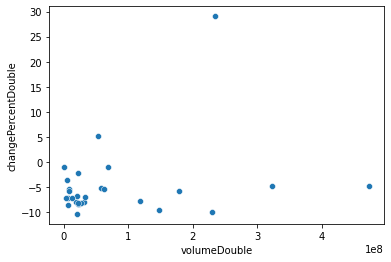

In [0]:
import seaborn as sns

f = 0.3
sample = coincap_df.select("volumeUsd24Hr", "changePercent24Hr").sample(fraction=f, seed = 9)

# prebacujem ove stringovne vrednosti u double
sample = sample.withColumn("volumeDouble", col("volumeUsd24Hr").cast("double"))
sample = sample.withColumn("changePercentDouble", col("changePercent24Hr").cast("double"))

# i uzimam samo te kolone sa double vrednostima
sample = sample.select("volumeDouble", "changePercentDouble")
sample = sample.toPandas()
# sample.show()

sns.scatterplot(data = sample, x = "volumeDouble", y = "changePercentDouble")
# Po ovom plotu mi se cini da volumeDouble i changePercentDouble uopste nemaju slicnosti. Ovaj plot ne lici na linearnost.

In [0]:
n = sample.size
r = np.corrcoef(sample["volumeDouble"], sample["changePercentDouble"])[0, 1]

t_value = r / np.sqrt((1 - r**2) / (n - 2))
t_value

Out[57]: 1.903192493630696

In [0]:
from scipy.stats import t

df = n - 2

p_value_lower = t.cdf(-np.abs(t_value), df)
p_value_upper = 1 - t.cdf(t_value, df)
p_value = p_value_lower + p_value_upper
p_value

Out[58]: 0.062160365088821806

In [0]:
# reject H0?
# H0 The null hypothesis states that there is no linear relationship
# HA is alternative to that.

# If p_value is less then alpha=0.05 then we disregard the H0, and it means those values have some correlation,
# if p_value is bigger then 0.05 then H0 is correct, there is no linear correlation
if p_value < 0.05:
    print('Odbacujemo H0 --> polja: "changePercent24Hr" i "volumeUsd24Hr" jesu povezana')
else:
    print('Ne odbacujemo H0 --> polja: "changePercent24Hr" i "volumeUsd24Hr" NISU povezana')

Ne odbacujemo H0 --> polja: "changePercent24Hr" i "volumeUsd24Hr" NISU povezana


Znaci nasa hipoteza (koju smo postavili tako sto smo posmatrali graph vrednosti iz te dve kolone) jeste tacna!
To jest. nema korelacije izmedju kolona changePercent24Hr i volumeUsd24Hr
Da je bilo korelacije, to znaci da, kad bismo hteli da radimo neku prediktivnu analizu sa ovim datasetom, bismo mozda morali da brisemo jednu od te dve kolone, 
jer nam ne daje nikakvih novih informacija.